In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [146]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def runpca(df, resultpath, plotpath):

    gene_ids = df.iloc[:, 0]  
    df = df.iloc[:, 1:]       
    df.index = gene_ids       

    df = df.T

    df.columns = df.columns.astype(str)

    selector = VarianceThreshold(threshold=0.01)
    X_reduced = selector.fit_transform(df)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reduced)

    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    # print("Cumulative Explained Variance:")
    # for i, var in enumerate(cumulative_variance):
    #     print(f"Component {i+1}: {var:.4f}")
    # print(f"Optimal number of PCA components chosen: {pca.n_components_}")

    importance = np.abs(pca.components_).sum(axis=0)
    selected_gene_ids = gene_ids[selector.get_support()]
    feature_importance = pd.Series(importance, index=selected_gene_ids)

    top_features = feature_importance.sort_values(ascending=False).head(20)
    # print("\nTop 20 Most Important Genes Contributing to PCA:")
    # print(top_features)

    top_features_df = top_features.reset_index()
    top_features_df.columns = ['GENE_ID', 'Score']
    top_features_df.to_csv(resultpath, index=False)

    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("PCA Scree Plot (After Feature Selection)")
    plt.grid()
    plt.savefig(plotpath, dpi=300, bbox_inches='tight') 
    

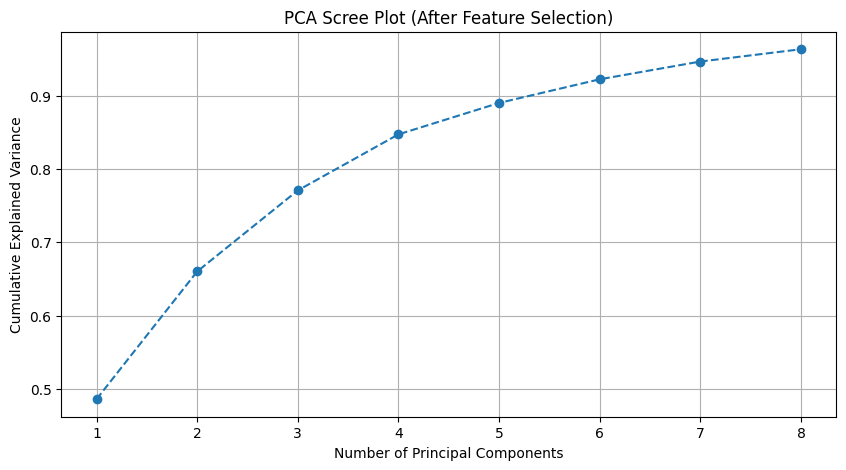

In [147]:
filepath='GSE273125_combined_second_columns.csv'
df = pd.read_csv(filepath)
runpca(df,'Results/GSE273125_features.csv','Results/GSE273125_plot.png')

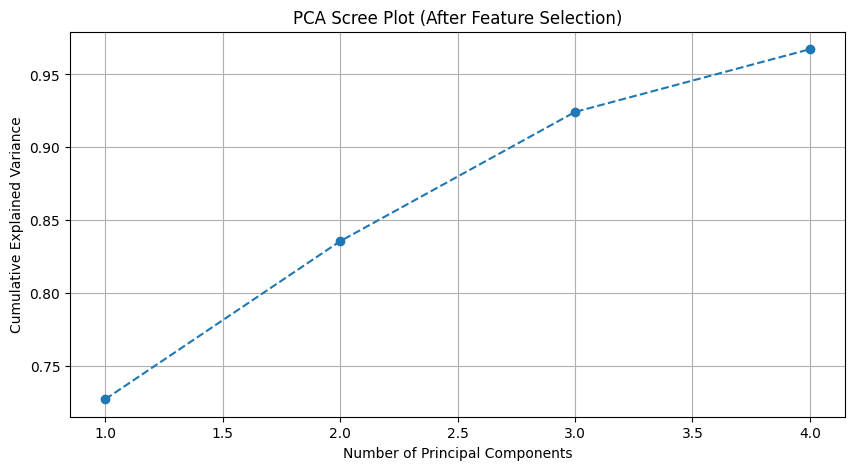

In [148]:
filepath='GSE38265_normalized.csv'
df = pd.read_csv(filepath)
runpca(df,'Results/GSE38265_features.csv','Results/GSE38265_plot.png')

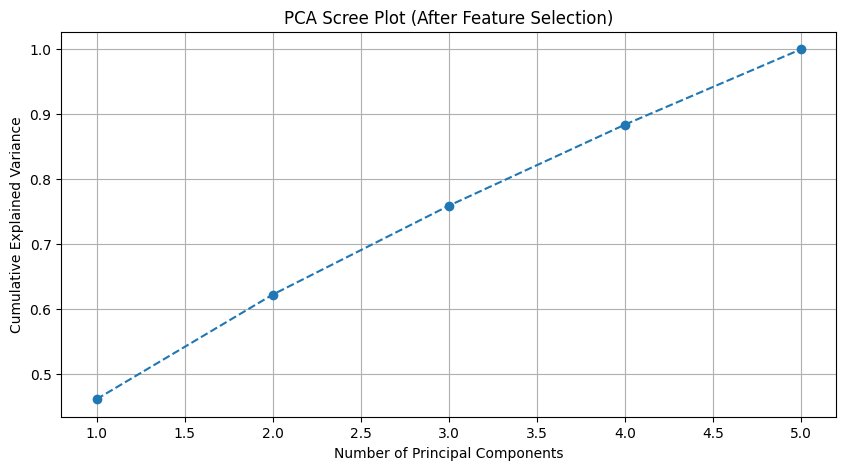

In [149]:
filepath='GSE61358_normalised.csv'
df = pd.read_csv(filepath)
df=df.iloc[:,:7]
runpca(df,'Results/GSE61358_features.csv','Results/GSE61358_plot.png')

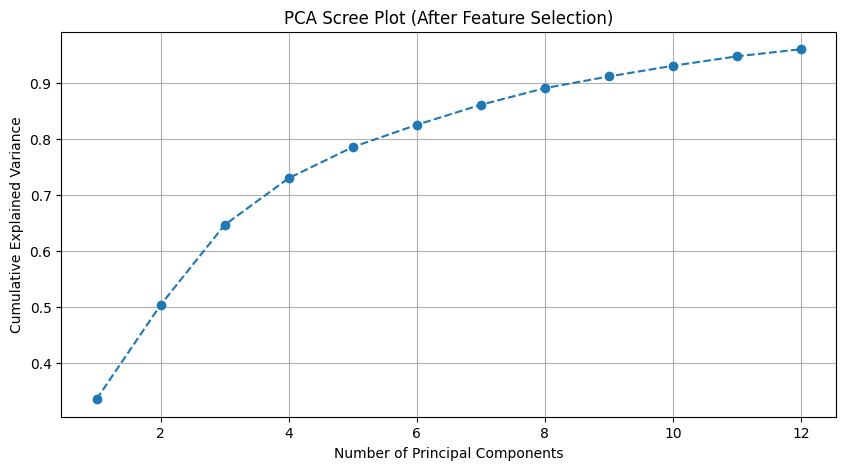

In [150]:
filepath='GSE193571_normalised.csv'
df = pd.read_csv(filepath)
runpca(df,'Results/GSE193571_features.csv','Results/GSE193571_plot.png')

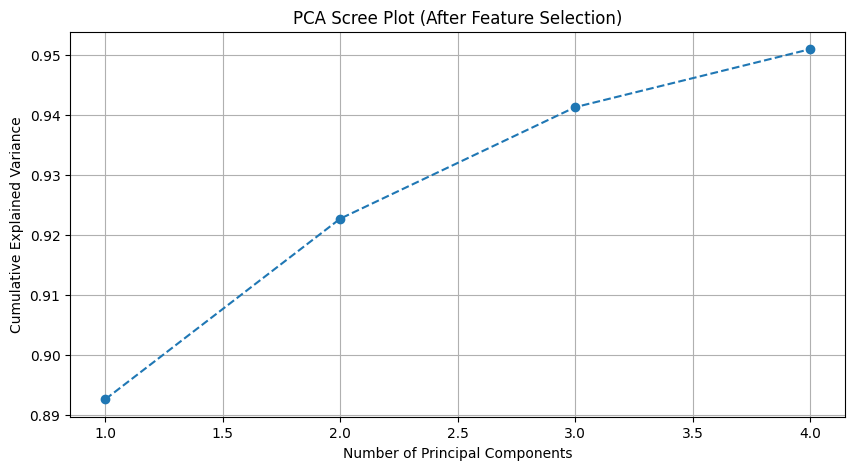

In [151]:
filepath='GSE251814_normalized_counts.csv'
df = pd.read_csv(filepath)
df = df.fillna(0)
df=df.iloc[:,1:]
runpca(df,'Results/GSE251814_features.csv','Results/GSE251814_plot.png')

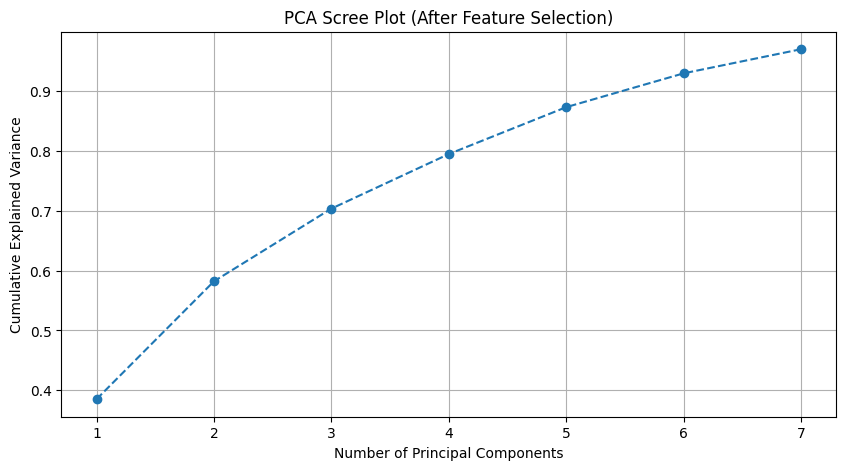

In [152]:
filepath='GSE266663_norm_counts_FPKM.csv'
df = pd.read_csv(filepath)
runpca(df,'Results/GSE266663_FPKM_features.csv','Results/GSE266663_FPKM_plot.png')

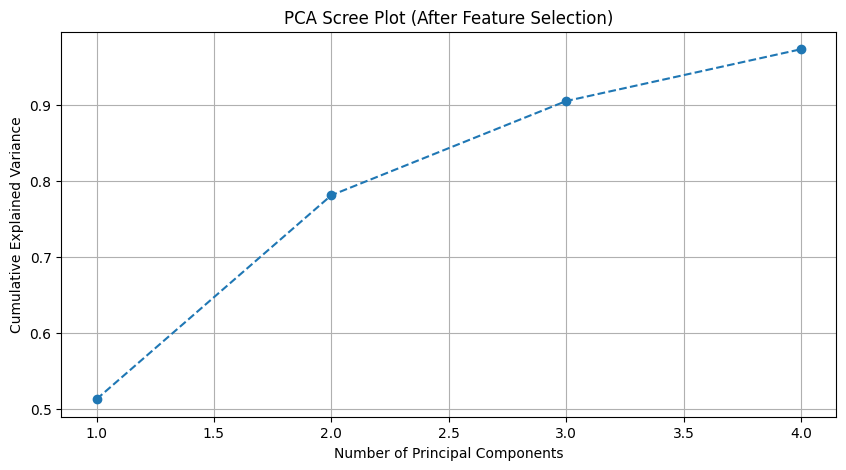

In [153]:
filepath='GSE266663_normalized.csv'
df = pd.read_csv(filepath)
runpca(df,'Results/GSE266663_features.csv','Results/GSE266663_plot.png')